In [19]:
print("CHECK")

CHECK


# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [39 lines of output]
  Traceback (most recent call last):
    File "C:\Users\kanis\anaconda3\lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
      parsed = _parse_requirement(requirement_string)
    File "C:\Users\kanis\anaconda3\lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
      return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
    File "C:\Users\kanis\anaconda3\lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
      url, specifier, marker = _parse_requirement_details(tokenizer)
    File "C:\Users\kanis\anaconda3\lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 126, in _parse_requirement_details
      marker = _parse_requirement_marker(
    File "C:\Users\kanis\anaconda3\lib\site-packages\setuptools\_vendor\packaging\_p

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/8c/ca/c3f0114272924e690c34fd2698dcd877ab2d881fe4196cc461a98d2b4693/tensorflow-2.15.0-cp39-cp39-win_amd64.whl.metadata
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


In [7]:
!pip install tensorflow

Retrieving notices: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\kanis\anaconda3

  added / updated specs:
    - jupyter


The following packages will be SUPERSEDED by a higher-priority channel:

  jupyter            conda-forge/noarch::jupyter-1.0.0-pyh~ --> pkgs/main/win-64::jupyter-1.0.0-py39haa95532_8 



Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done
  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/8c/ca/c3f0114272924e690c34fd2698dcd877ab2d881fe4196cc461a98d2b4693/tensorflow-2.15.0-cp39-cp39-win_amd64.whl.metadata
  Using cached tensorflow-2.15.0-cp39-cp39-win_amd64.whl.metadata (3.6 kB)
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/1b/86/cda55138387a291fb684691d159742e6196daad571f01de60f809e266d40/tensorflow_intel-2.15.0-cp39-cp

In [8]:
!pip list

Package                       Version
----------------------------- ---------------
absl-py                       2.0.0
alabaster                     0.7.13
anaconda-anon-usage           0.4.3
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.4
anaconda-navigator            2.5.0
anaconda-project              0.11.1
annotated-types               0.5.0
anyio                         3.7.1
appdirs                       1.4.4
argon2-cffi                   23.1.0
argon2-cffi-bindings          21.2.0
arrow                         1.3.0
astroid                       2.14.2
astropy                       5.3.4
asttokens                     2.4.0
astunparse                    1.6.3
atomicwrites                  1.4.1
attrs                         23.1.0
Automat                       22.10.0
autopep8                      2.0.4
Babel                         2.12.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.5
backports.tempfile            1.0
backport

In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [4]:
import cv2
import imghdr

In [5]:
data_dir = 'data' 

In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

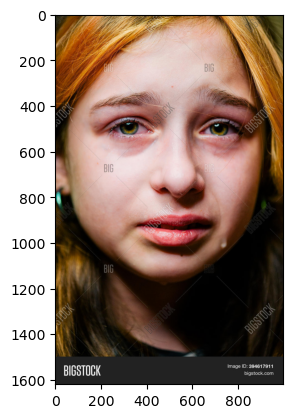

array([[[53, 52, 34],
        [44, 43, 25],
        [45, 44, 26],
        ...,
        [69, 70, 30],
        [67, 68, 28],
        [66, 67, 27]],

       [[47, 46, 28],
        [48, 47, 29],
        [30, 29, 11],
        ...,
        [72, 73, 33],
        [70, 71, 31],
        [70, 71, 31]],

       [[68, 67, 49],
        [42, 41, 23],
        [44, 43, 25],
        ...,
        [73, 74, 34],
        [72, 73, 33],
        [72, 73, 33]],

       ...,

       [[34, 34, 34],
        [34, 34, 34],
        [34, 34, 34],
        ...,
        [34, 34, 34],
        [34, 34, 34],
        [34, 34, 34]],

       [[34, 34, 34],
        [34, 34, 34],
        [34, 34, 34],
        ...,
        [34, 34, 34],
        [34, 34, 34],
        [34, 34, 34]],

       [[34, 34, 34],
        [34, 34, 34],
        [34, 34, 34],
        ...,
        [34, 34, 34],
        [34, 34, 34],
        [34, 34, 34]]], dtype=uint8)

In [8]:
# Trial
image_path = os.path.join(data_dir, "sad", "394617911.jpg")
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
img

In [9]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [6]:
import numpy as np
from matplotlib import pyplot as plt

In [7]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 488 files belonging to 2 classes.


In [11]:
data_iterator = data.as_numpy_iterator()

In [18]:
batch = data_iterator.next()

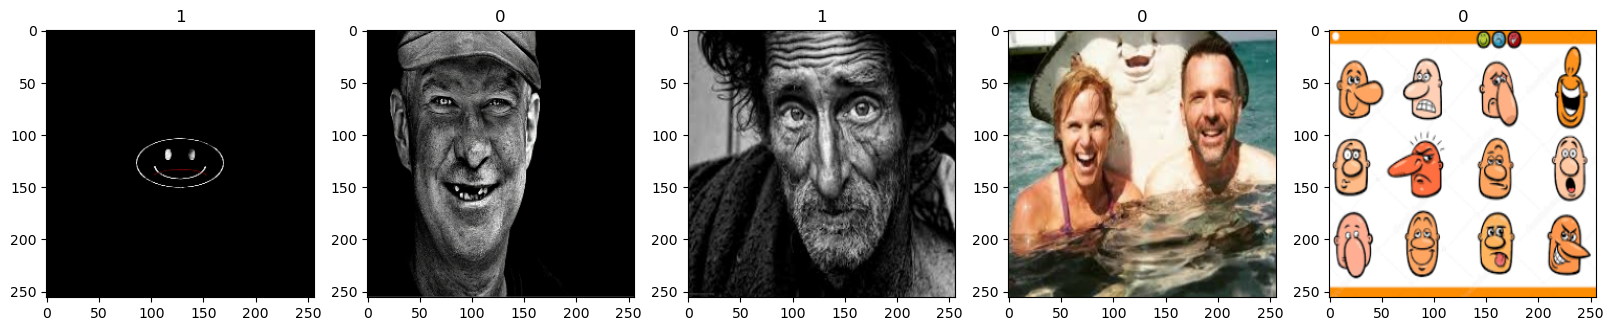

In [19]:
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [8]:
data = data.map(lambda x,y: (x/255, y))

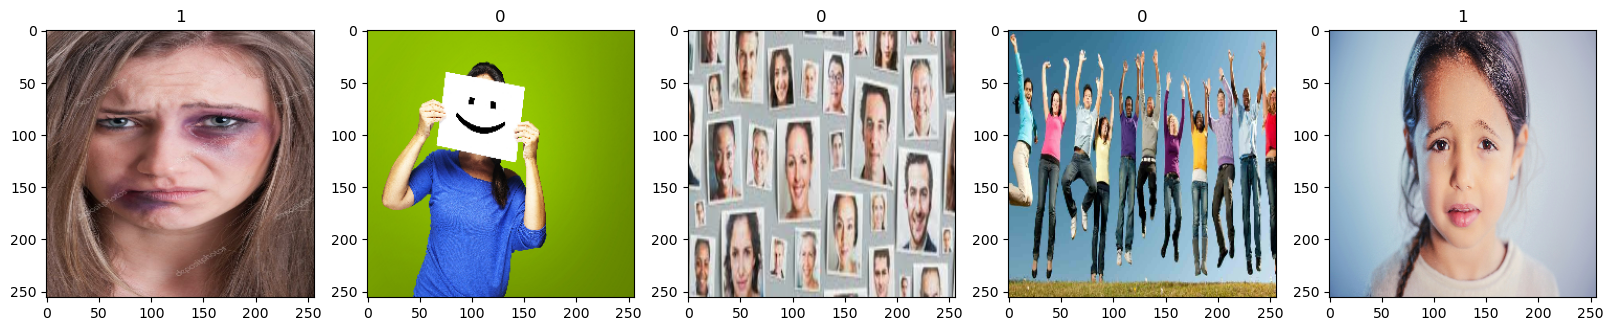

In [28]:
batch = data.as_numpy_iterator().next()
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# 5. Split Data

In [36]:
len(data)

16

In [9]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)

In [10]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [39]:
print(len(train), len(val), len(test))

11 4 1


# 6. Build Deep Learning Model

In [40]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [12]:
model = Sequential()

In [13]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [14]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# 7. Train

In [15]:
logdir='logs'

In [16]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [17]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


11/11 [==============================] - 8s 512ms/step - loss: 0.7555 - accuracy: 0.5085 - val_loss: 0.6869 - val_accuracy: 0.5938
Epoch 2/20
11/11 [==============================] - 7s 490ms/step - loss: 0.6843 - accuracy: 0.5795 - val_loss: 0.6481 - val_accuracy: 0.6172
Epoch 3/20
11/11 [==============================] - 7s 498ms/step - loss: 0.6569 - accuracy: 0.6449 - val_loss: 0.6343 - val_accuracy: 0.6641
Epoch 4/20
11/11 [==============================] - 7s 501ms/step - loss: 0.6130 - accuracy: 0.6562 - val_loss: 0.5135 - val_accuracy: 0.8438
Epoch 5/20
11/11 [==============================] - 7s 514ms/step - loss: 0.4861 - accuracy: 0.7869 - val_loss: 0.3571 - val_accuracy: 0.8672
Epoch 6/20
11/11 [==============================] - 7s 510ms/step - loss: 0.4406 - accuracy: 0.8182 - val_loss: 0.3857 - val_accuracy: 0.7812
Epoch 7/20
11/11 [==============================] - 7s 517ms/step - loss: 0.3526 - accuracy: 0.8438 - val_loss: 0.2930 - val_accuracy: 0.8984
Epoc

In [54]:
hist

# 8. Plot Performance

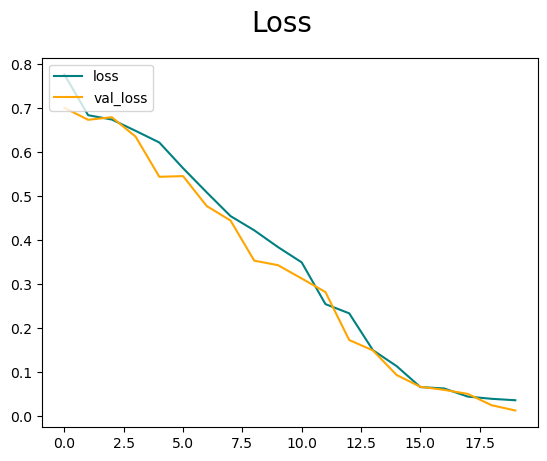

In [52]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

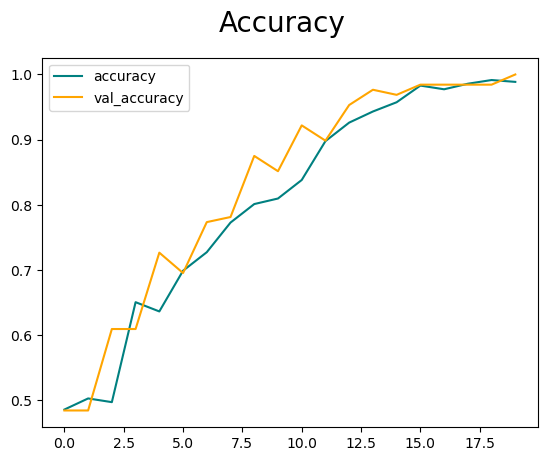

In [53]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [93]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [94]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [95]:
len(test)

1

In [96]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 31ms/step


In [99]:
print(pre.result().numpy(), re.result().numpy(), acc.result().numpy())

1.0 1.0 1.0


# 10. Test

In [21]:
import cv2

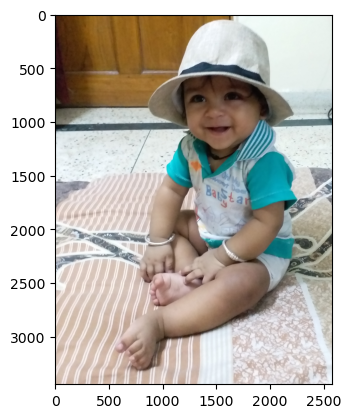

In [43]:
img = cv2.imread('20170618_194158.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

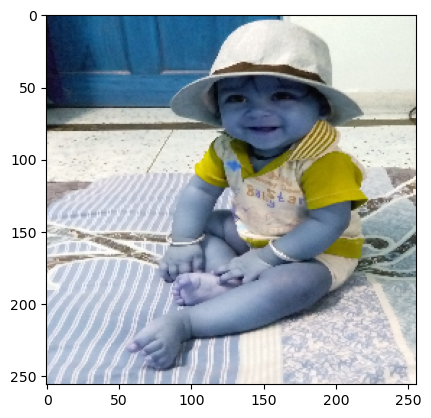

In [44]:
resized_img = tf.image.resize(img, (256,256))
plt.imshow(resized_img.numpy().astype(int))
plt.show()

In [45]:
yhat = model.predict(np.expand_dims(resized_img/255,0))

1/1 [==============================] - 0s 16ms/step


In [46]:
yhat

array([[0.6078908]], dtype=float32)

In [47]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


# 11. Save the Model

In [33]:
from tensorflow.keras.models import load_model

In [34]:
model.save(os.path.join('models','imageclassifier.h5'))

C:\Users\kanis\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [36]:
new_model = load_model(os.path.join('models','imageclassifier.h5'))

In [38]:
new_model.predict(np.expand_dims(resized_img/255, 0))

1/1 [==============================] - 0s 78ms/step


array([[0.99243635]], dtype=float32)